In [1]:
import numpy as np
import pandas as pd
import datetime
import pickle
import glob

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# timezone
import pytz


 Obtain list of air temperature data CSV files from Dec 2016 to Dec 2019

In [2]:
data_filelist_airtemp = glob.glob("air-temperature/*.csv")

data_filelist_airtemp


['air-temperature\\nea_air-temperature_S24_from_2016-12-01_to_2016-12-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-01-01_to_2017-01-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-02-01_to_2017-02-28.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-03-01_to_2017-03-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-04-01_to_2017-04-30.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-05-01_to_2017-05-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-06-01_to_2017-06-30.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-07-01_to_2017-07-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-08-01_to_2017-08-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-09-01_to_2017-09-30.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-10-01_to_2017-10-31.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017-11-01_to_2017-11-30.csv',
 'air-temperature\\nea_air-temperature_S24_from_2017

 Obtain list of rainfall data CSV files from Dec 2016 to Dec 2019

In [3]:
data_filelist_rain = glob.glob("rainfall/*.csv")

data_filelist_rain


['rainfall\\nea_rainfall_S24_from_2016-12-01_to_2016-12-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-01-01_to_2017-01-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-02-01_to_2017-02-28.csv',
 'rainfall\\nea_rainfall_S24_from_2017-03-01_to_2017-03-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-04-01_to_2017-04-30.csv',
 'rainfall\\nea_rainfall_S24_from_2017-05-01_to_2017-05-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-06-01_to_2017-06-30.csv',
 'rainfall\\nea_rainfall_S24_from_2017-07-01_to_2017-07-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-08-01_to_2017-08-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-09-01_to_2017-09-30.csv',
 'rainfall\\nea_rainfall_S24_from_2017-10-01_to_2017-10-31.csv',
 'rainfall\\nea_rainfall_S24_from_2017-11-01_to_2017-11-30.csv',
 'rainfall\\nea_rainfall_S24_from_2017-12-01_to_2017-12-31.csv',
 'rainfall\\nea_rainfall_S24_from_2018-01-01_to_2018-01-31.csv',
 'rainfall\\nea_rainfall_S24_from_2018-02-01_to_2018-02-28.csv',
 'rainfall\\nea_rainfall_

 Concatenate data tables from air temperature data CSV files

In [4]:
df_airtemp = pd.concat([pd.read_csv(file, index_col=0) for file in data_filelist_airtemp])

df_airtemp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740601 entries, 0 to 44566
Data columns (total 4 columns):
index         int64
timestamp     object
station_id    object
value         float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.4+ MB


 Convert timestamp to datetime[ns] format with UTC offset

In [5]:
df_airtemp['timestamp'] = pd.to_datetime(df_airtemp['timestamp'], infer_datetime_format=True, utc=True)

df_airtemp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740601 entries, 0 to 44566
Data columns (total 4 columns):
index         int64
timestamp     datetime64[ns, UTC]
station_id    object
value         float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 66.4+ MB


 Drop redundant columns from air temperature dataframe + set Timestamp as Index

In [6]:
df_airtemp_data = df_airtemp.drop(columns=['index', 'station_id']).set_index('timestamp')

df_airtemp_data


value
timestamp                       
2016-11-30 16:00:59+00:00   27.4
2016-11-30 16:01:59+00:00   27.4
2016-11-30 16:02:59+00:00   27.4
2016-11-30 16:03:59+00:00   27.4
2016-11-30 16:04:59+00:00   27.4
...                          ...
2019-12-31 15:55:00+00:00   26.7
2019-12-31 15:56:00+00:00   26.7
2019-12-31 15:57:00+00:00   26.7
2019-12-31 15:58:00+00:00   26.7
2019-12-31 15:59:00+00:00   26.7

[1740601 rows x 1 columns]

 Convert timestamp to UTC +8 (Singapore) offset

In [7]:
df_airtemp_data = df_airtemp_data.tz_convert('Asia/Singapore')

df_airtemp_data


value
timestamp                       
2016-12-01 00:00:59+08:00   27.4
2016-12-01 00:01:59+08:00   27.4
2016-12-01 00:02:59+08:00   27.4
2016-12-01 00:03:59+08:00   27.4
2016-12-01 00:04:59+08:00   27.4
...                          ...
2019-12-31 23:55:00+08:00   26.7
2019-12-31 23:56:00+08:00   26.7
2019-12-31 23:57:00+08:00   26.7
2019-12-31 23:58:00+08:00   26.7
2019-12-31 23:59:00+08:00   26.7

[1740601 rows x 1 columns]

 Rename value column to 'air temperature'

In [8]:
df_airtemp_data.rename(columns={'value':'air temperature'}, inplace=True)

df_airtemp_data


air temperature
timestamp                                 
2016-12-01 00:00:59+08:00             27.4
2016-12-01 00:01:59+08:00             27.4
2016-12-01 00:02:59+08:00             27.4
2016-12-01 00:03:59+08:00             27.4
2016-12-01 00:04:59+08:00             27.4
...                                    ...
2019-12-31 23:55:00+08:00             26.7
2019-12-31 23:56:00+08:00             26.7
2019-12-31 23:57:00+08:00             26.7
2019-12-31 23:58:00+08:00             26.7
2019-12-31 23:59:00+08:00             26.7

[1740601 rows x 1 columns]

 Concatenate data tables from rainfall data CSV files

In [9]:
df_rain = pd.concat([pd.read_csv(file, index_col=0) for file in data_filelist_rain])

df_rain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311456 entries, 0 to 8895
Data columns (total 4 columns):
index         311456 non-null int64
timestamp     311456 non-null object
station_id    311456 non-null object
value         307406 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.9+ MB


In [10]:
# Convert timestamp to datetime[ns] format with UTC offset

df_rain['timestamp'] = pd.to_datetime(df_rain['timestamp'], infer_datetime_format=True, utc=True)

df_rain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311456 entries, 0 to 8895
Data columns (total 4 columns):
index         311456 non-null int64
timestamp     311456 non-null datetime64[ns, UTC]
station_id    311456 non-null object
value         307406 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 11.9+ MB


In [11]:
# Drop redundant columns from rainfall dataframe + set Timestamp as Index

df_rain_data = df_rain.drop(columns=['index', 'station_id']).set_index('timestamp')

df_rain_data


value
timestamp                       
2016-12-02 13:49:59+00:00    0.0
2016-12-02 13:54:59+00:00    0.0
2016-12-02 13:59:59+00:00    0.0
2016-12-02 14:04:59+00:00    0.0
2016-12-02 14:09:59+00:00    0.0
...                          ...
2019-12-31 15:35:00+00:00    0.0
2019-12-31 15:40:00+00:00    0.0
2019-12-31 15:45:00+00:00    0.0
2019-12-31 15:50:00+00:00    0.0
2019-12-31 15:55:00+00:00    0.0

[311456 rows x 1 columns]

In [12]:
# Convert timestamp to UTC +8 (Singapore) offset

df_rain_data.index = df_rain_data.index.tz_convert('Asia/Singapore')

df_rain_data.index


DatetimeIndex(['2016-12-02 21:49:59+08:00', '2016-12-02 21:54:59+08:00',
               '2016-12-02 21:59:59+08:00', '2016-12-02 22:04:59+08:00',
               '2016-12-02 22:09:59+08:00', '2016-12-02 22:14:59+08:00',
               '2016-12-02 22:19:59+08:00', '2016-12-02 22:24:59+08:00',
               '2016-12-02 22:29:59+08:00', '2016-12-02 22:34:59+08:00',
               ...
               '2019-12-31 23:10:00+08:00', '2019-12-31 23:15:00+08:00',
               '2019-12-31 23:20:00+08:00', '2019-12-31 23:25:00+08:00',
               '2019-12-31 23:30:00+08:00', '2019-12-31 23:35:00+08:00',
               '2019-12-31 23:40:00+08:00', '2019-12-31 23:45:00+08:00',
               '2019-12-31 23:50:00+08:00', '2019-12-31 23:55:00+08:00'],
              dtype='datetime64[ns, Asia/Singapore]', name='timestamp', length=311456, freq=None)

In [13]:
# Rename value column to 'rainfall'

df_rain_data.rename(columns={'value':'rainfall'}, inplace=True)

df_rain_data


rainfall
timestamp                          
2016-12-02 21:49:59+08:00       0.0
2016-12-02 21:54:59+08:00       0.0
2016-12-02 21:59:59+08:00       0.0
2016-12-02 22:04:59+08:00       0.0
2016-12-02 22:09:59+08:00       0.0
...                             ...
2019-12-31 23:35:00+08:00       0.0
2019-12-31 23:40:00+08:00       0.0
2019-12-31 23:45:00+08:00       0.0
2019-12-31 23:50:00+08:00       0.0
2019-12-31 23:55:00+08:00       0.0

[311456 rows x 1 columns]

In [14]:
# Concatenate air temperature and rainfall data along column axis
# Since time period between data points not uniform across timeframe,
# resampling is needed to space out data points evenly.

df_weather_data_min = pd.concat([
    df_airtemp_data.resample('5T').mean().ffill(),
    df_rain_data.resample('5T').mean().ffill()],
    axis=1)

df_weather_data_min


air temperature  rainfall
timestamp                                           
2016-12-01 00:00:00+08:00            27.40       NaN
2016-12-01 00:05:00+08:00            27.40       NaN
2016-12-01 00:10:00+08:00            27.38       NaN
2016-12-01 00:15:00+08:00            27.34       NaN
2016-12-01 00:20:00+08:00            27.30       NaN
...                                    ...       ...
2019-12-31 23:35:00+08:00            26.70       0.0
2019-12-31 23:40:00+08:00            26.70       0.0
2019-12-31 23:45:00+08:00            26.70       0.0
2019-12-31 23:50:00+08:00            26.70       0.0
2019-12-31 23:55:00+08:00            26.70       0.0

[324288 rows x 2 columns]

 Check for number of missing values

In [15]:
df_weather_data_min.isnull().sum()


air temperature      0
rainfall           549
dtype: int64

 Downsample data points from 5-minute frequency to hourly frequency,
 taking mean value within each time period as data to resample

In [16]:
df_weather_data_hour = df_weather_data_min.resample('H').mean().ffill()

df_weather_data_hour


air temperature  rainfall
timestamp                                           
2016-12-01 00:00:00+08:00        27.320000       NaN
2016-12-01 01:00:00+08:00        26.733333       NaN
2016-12-01 02:00:00+08:00        25.545000       NaN
2016-12-01 03:00:00+08:00        25.810000       NaN
2016-12-01 04:00:00+08:00        26.153333       NaN
...                                    ...       ...
2019-12-31 19:00:00+08:00        27.946667       0.0
2019-12-31 20:00:00+08:00        27.515000       0.0
2019-12-31 21:00:00+08:00        27.158333       0.0
2019-12-31 22:00:00+08:00        26.925000       0.0
2019-12-31 23:00:00+08:00        26.695000       0.0

[27024 rows x 2 columns]

Text(0.5, 1.0, 'Mean hourly sampling of air temperature at Changi Weather Station')

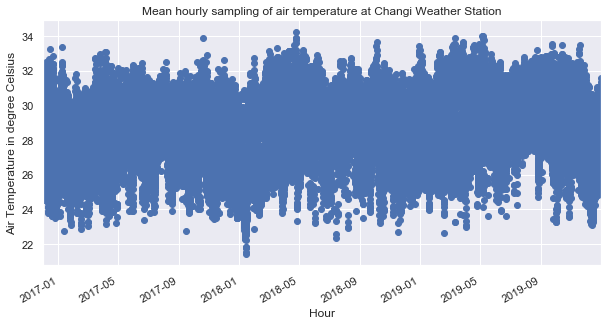

In [17]:

plt.figure(figsize=(10,5))
df_weather_data_hour['air temperature'].plot(marker='o', linestyle='none')
plt.xlabel('Hour')
plt.ylabel('Air Temperature in degree Celsius')
plt.title('Mean hourly sampling of air temperature at Changi Weather Station')


 Downsample data points from minute-by-minute to weekly frequency,
 taking mean value within each time period as data to resample

In [18]:
df_weather_data_week = df_weather_data_min.resample('W').mean()

df_weather_data_week


air temperature  rainfall
timestamp                                           
2016-12-04 00:00:00+08:00        27.277214  0.032504
2016-12-11 00:00:00+08:00        27.670484  0.044147
2016-12-18 00:00:00+08:00        27.938065  0.017163
2016-12-25 00:00:00+08:00        27.359523  0.061607
2017-01-01 00:00:00+08:00        26.676448  0.003274
...                                    ...       ...
2019-12-08 00:00:00+08:00        27.460936  0.031151
2019-12-15 00:00:00+08:00        24.918628  0.150992
2019-12-22 00:00:00+08:00        26.463138  0.023909
2019-12-29 00:00:00+08:00        27.544244  0.007341
2020-01-05 00:00:00+08:00        27.852214  0.000000

[162 rows x 2 columns]

C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


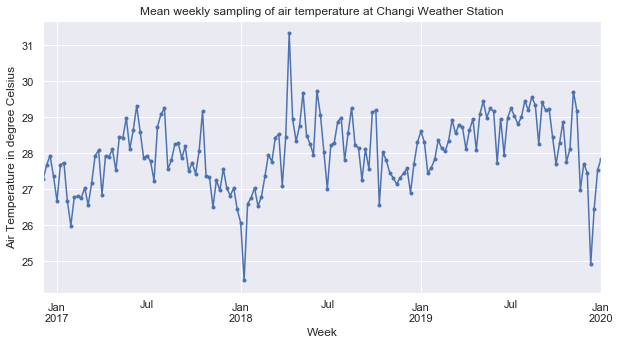

In [19]:

plt.figure(figsize=(10,5))
df_weather_data_week['air temperature'].plot(marker='.', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Air Temperature in degree Celsius')
plt.title('Mean weekly sampling of air temperature at Changi Weather Station');


C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


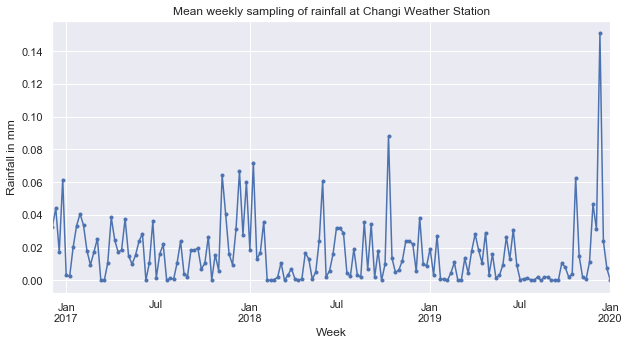

In [20]:

plt.figure(figsize=(10,5))
df_weather_data_week['rainfall'].plot(marker='.', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Rainfall in mm')
plt.title('Mean weekly sampling of rainfall at Changi Weather Station');


 Downsample data points from minute-by-minute to monthly frequency,
 taking mean value within each time period as data to resample

In [21]:
df_weather_data_month = df_weather_data_min.resample('M').mean()

df_weather_data_month


air temperature  rainfall
timestamp                                           
2016-12-31 00:00:00+08:00        27.395605  0.032605
2017-01-31 00:00:00+08:00        26.989933  0.022177
2017-02-28 00:00:00+08:00        26.909179  0.019742
2017-03-31 00:00:00+08:00        27.366801  0.015300
2017-04-30 00:00:00+08:00        27.792616  0.024097
2017-05-31 00:00:00+08:00        28.471918  0.019937
2017-06-30 00:00:00+08:00        28.477880  0.012292
2017-07-31 00:00:00+08:00        28.283390  0.008893
2017-08-31 00:00:00+08:00        28.123108  0.009386
2017-09-30 00:00:00+08:00        27.967640  0.014606
2017-10-31 00:00:00+08:00        27.876250  0.012590
2017-11-30 00:00:00+08:00        27.077181  0.031296
2017-12-31 00:00:00+08:00        26.960769  0.042159
2018-01-31 00:00:00+08:00        26.104047  0.033692
2018-02-28 00:00:00+08:00        26.977186  0.001835
2018-03-31 00:00:00+08:00        27.975424  0.005175
2018-04-30 00:00:00+08:00        29.252020  0.004907
2018-05-31 00:00:00+08:00        28.648024  0.014830
2018-06-30 00:00:00+08:00        28.478737  0.021204
2018-07-31 00:00:00+08:00        28.479629  0.016062
2018-08-31 00:00:00+08:00        28.515670  0.013642
2018-09-30 00:00:00+08:00        27.987959  0.013542
2018-10-31 00:00:00+08:00        27.901239  0.026411
2018-11-30 00:00:00+08:00        27.291097  0.019722
2018-12-31 00:00:00+08:00        27.580152  0.019355
2019-01-31 00:00:00+08:00        27.964450  0.007146
2019-02-28 00:00:00+08:00        28.227237  0.003943
2019-03-31 00:00:00+08:00        28.705700  0.008087
2019-04-30 00:00:00+08:00        28.480433  0.020185
2019-05-31 00:00:00+08:00        29.254163  0.006004
2019-06-30 00:00:00+08:00        28.419417  0.020231
2019-07-31 00:00:00+08:00        29.073852  0.000672
2019-08-31 00:00:00+08:00        29.127703  0.001344
2019-09-30 00:00:00+08:00        29.029197  0.002639
2019-10-31 00:00:00+08:00        28.133149  0.018884
2019-11-30 00:00:00+08:00        28.412411  0.015810
2019-12-31 00:00:00+08:00        26.734774  0.048185

C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


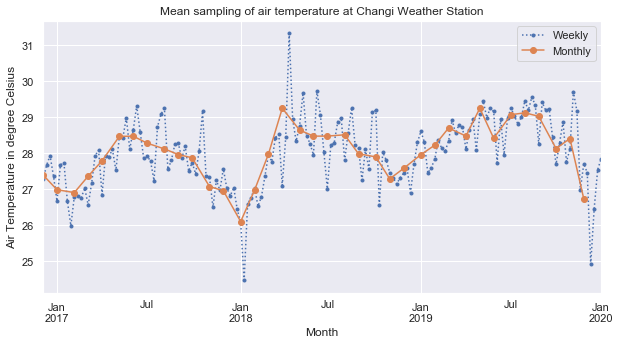

In [22]:

plt.figure(figsize=(10,5))
df_weather_data_week['air temperature'].plot(marker='.', linestyle=':', label='Weekly')
df_weather_data_month['air temperature'].plot(marker='o', linestyle='-', label='Monthly')
plt.xlabel('Month')
plt.ylabel('Air Temperature in degree Celsius')
plt.title('Mean sampling of air temperature at Changi Weather Station')
plt.legend();


C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


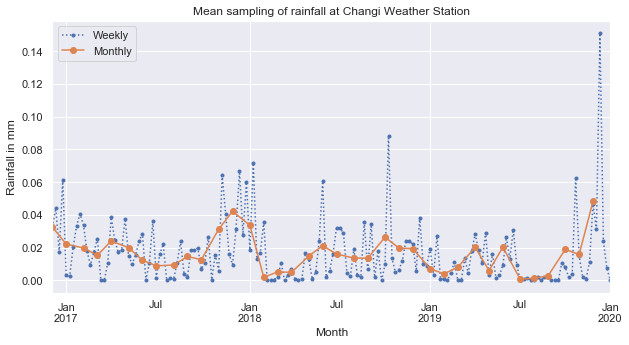

In [23]:

plt.figure(figsize=(10,5))
df_weather_data_week['rainfall'].plot(marker='.', linestyle=':', label='Weekly')
df_weather_data_month['rainfall'].plot(marker='o', linestyle='-', label='Monthly')
plt.xlabel('Month')
plt.ylabel('Rainfall in mm')
plt.title('Mean sampling of rainfall at Changi Weather Station')
plt.legend();


 Prepare data for trend and seasonality analysis

In [24]:
df_weather_data_min['Year'] = df_weather_data_min.index.year

df_weather_data_min['Month'] = df_weather_data_min.index.month

df_weather_data_min.sample(5, random_state=0)


air temperature  rainfall  Year  Month
timestamp                                                        
2019-08-25 02:50:00+08:00            27.66       0.0  2019      8
2018-03-23 01:00:00+08:00            32.30       0.0  2018      3
2018-09-27 18:20:00+08:00            30.50       0.0  2018      9
2019-05-07 01:55:00+08:00            28.76       0.0  2019      5
2017-06-19 17:00:00+08:00            29.42       0.0  2017      6

# Extracting Seasonality from Weather Dta
 Box plot of month-wise distribution of weather data

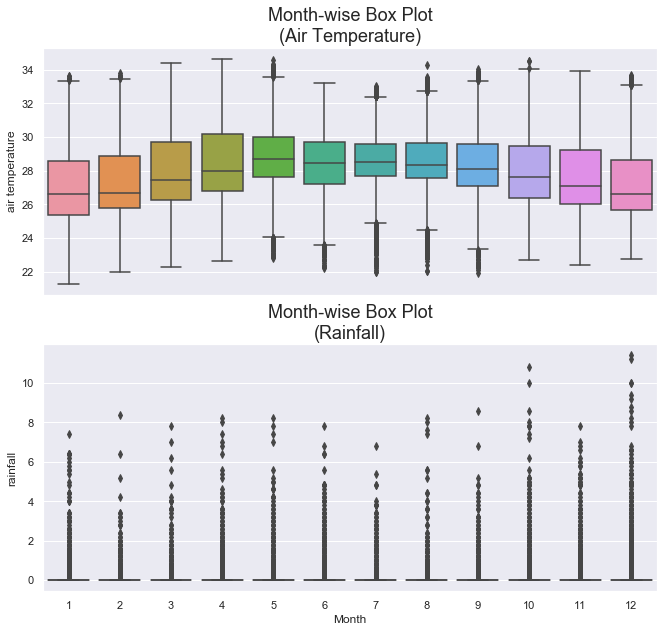

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['air temperature', 'rainfall'], axes):
    sns.boxplot(data=df_weather_data_min, x='Month', y=name, ax=ax)
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
# Set Title
axes[0].set_title('Month-wise Box Plot\n(Air Temperature)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(Rainfall)', fontsize=18)
plt.show()


 Box plot of year-wise distribution of weather data

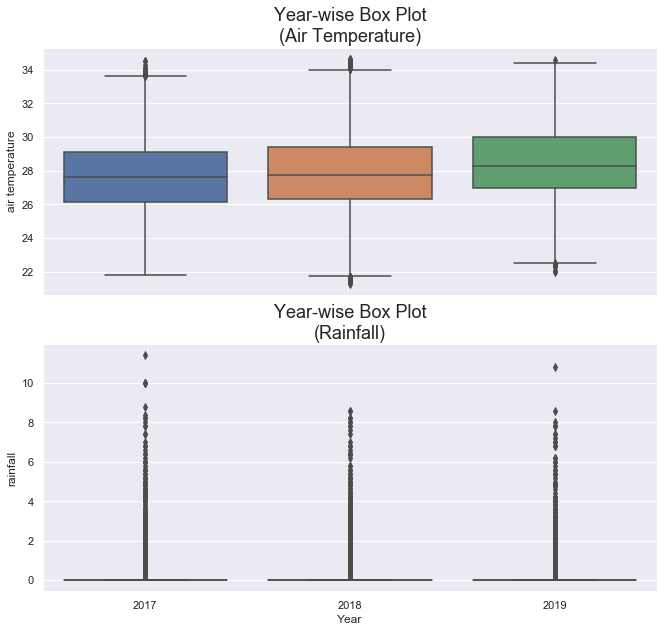

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['air temperature', 'rainfall'], axes):
    sns.boxplot(data=df_weather_data_min[df_weather_data_min['Year'] > 2016], x='Year', y=name, ax=ax)
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
# Set Title
axes[0].set_title('Year-wise Box Plot\n(Air Temperature)', fontsize=18); 
axes[1].set_title('Year-wise Box Plot\n(Rainfall)', fontsize=18)
plt.show()


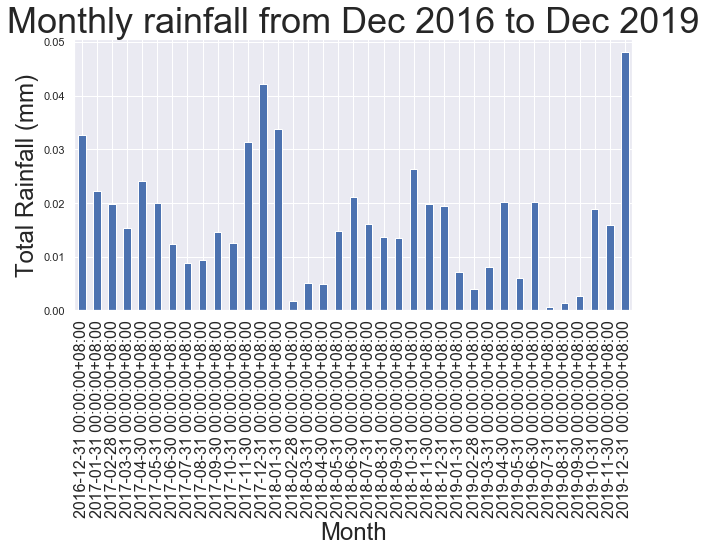

In [27]:
plt.figure(figsize=(10,5))
df_weather_data_month['rainfall'].plot.bar()
plt.title('Monthly rainfall from Dec 2016 to Dec 2019', fontsize=36)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Total Rainfall (mm)', fontsize=24)
plt.xticks(fontsize=16);

# Associate rainfall occurrence with temperature

In [28]:
df_weather_data_min['rain?'] = df_weather_data_min['rainfall'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')

df_weather_data_min['rain?']


timestamp
2016-12-01 00:00:00+08:00    No Rain
2016-12-01 00:05:00+08:00    No Rain
2016-12-01 00:10:00+08:00    No Rain
2016-12-01 00:15:00+08:00    No Rain
2016-12-01 00:20:00+08:00    No Rain
                              ...   
2019-12-31 23:35:00+08:00    No Rain
2019-12-31 23:40:00+08:00    No Rain
2019-12-31 23:45:00+08:00    No Rain
2019-12-31 23:50:00+08:00    No Rain
2019-12-31 23:55:00+08:00    No Rain
Freq: 5T, Name: rain?, Length: 324288, dtype: object

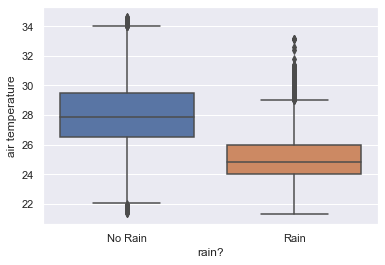

In [29]:


sns.boxplot(data=df_weather_data_min, x='rain?', y='air temperature');



In [30]:

df_weather_rainy_days = df_weather_data_hour['rainfall'].resample('D').apply(
    lambda x: 1 if x.any() > 0 else 0 if x.all() == 0 else None)

df_weather_rainy_days


timestamp
2016-12-01 00:00:00+08:00    NaN
2016-12-02 00:00:00+08:00    0.0
2016-12-03 00:00:00+08:00    1.0
2016-12-04 00:00:00+08:00    1.0
2016-12-05 00:00:00+08:00    1.0
                            ... 
2019-12-27 00:00:00+08:00    0.0
2019-12-28 00:00:00+08:00    0.0
2019-12-29 00:00:00+08:00    0.0
2019-12-30 00:00:00+08:00    0.0
2019-12-31 00:00:00+08:00    0.0
Freq: D, Name: rainfall, Length: 1126, dtype: float64

In [31]:

df_weather_monthly_rainy_days = df_weather_rainy_days.resample('M').sum()

df_weather_monthly_rainy_days


timestamp
2016-12-31 00:00:00+08:00    21.0
2017-01-31 00:00:00+08:00    21.0
2017-02-28 00:00:00+08:00    15.0
2017-03-31 00:00:00+08:00    11.0
2017-04-30 00:00:00+08:00    21.0
2017-05-31 00:00:00+08:00    15.0
2017-06-30 00:00:00+08:00    10.0
2017-07-31 00:00:00+08:00     9.0
2017-08-31 00:00:00+08:00    18.0
2017-09-30 00:00:00+08:00    19.0
2017-10-31 00:00:00+08:00    21.0
2017-11-30 00:00:00+08:00    24.0
2017-12-31 00:00:00+08:00    23.0
2018-01-31 00:00:00+08:00    26.0
2018-02-28 00:00:00+08:00     5.0
2018-03-31 00:00:00+08:00    11.0
2018-04-30 00:00:00+08:00    10.0
2018-05-31 00:00:00+08:00    19.0
2018-06-30 00:00:00+08:00    17.0
2018-07-31 00:00:00+08:00    10.0
2018-08-31 00:00:00+08:00    11.0
2018-09-30 00:00:00+08:00    12.0
2018-10-31 00:00:00+08:00    20.0
2018-11-30 00:00:00+08:00    27.0
2018-12-31 00:00:00+08:00    19.0
2019-01-31 00:00:00+08:00     9.0
2019-02-28 00:00:00+08:00     5.0
2019-03-31 00:00:00+08:00     6.0
2019-04-30 00:00:00+08:00     9.0
2019

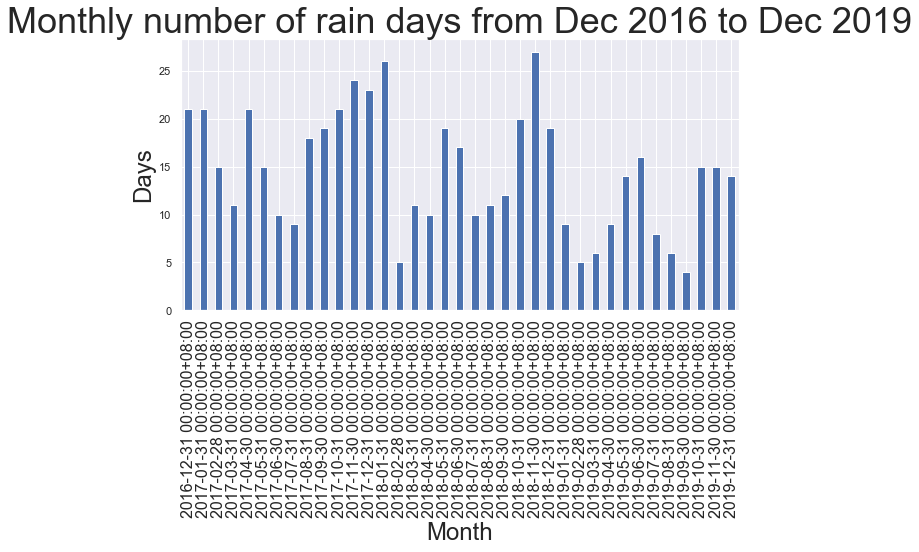

In [32]:

plt.figure(figsize=(10,5))
df_weather_monthly_rainy_days.plot.bar()
plt.title('Monthly number of rain days from Dec 2016 to Dec 2019', fontsize=36)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Days', fontsize=24)
plt.xticks(fontsize=16);


 Determining Weather Trends by Rolling Windows

In [33]:
df_weather_data_daily = df_weather_data_min[['air temperature','rainfall']].resample('D').mean()

df_weather_data_daily


air temperature  rainfall
timestamp                                           
2016-12-01 00:00:00+08:00        25.770833       NaN
2016-12-02 00:00:00+08:00        27.475538  0.000000
2016-12-03 00:00:00+08:00        27.311285  0.003472
2016-12-04 00:00:00+08:00        28.551198  0.064583
2016-12-05 00:00:00+08:00        28.700608  0.002778
...                                    ...       ...
2019-12-27 00:00:00+08:00        27.693785  0.000000
2019-12-28 00:00:00+08:00        27.615851  0.000000
2019-12-29 00:00:00+08:00        27.945573  0.000000
2019-12-30 00:00:00+08:00        27.954965  0.000000
2019-12-31 00:00:00+08:00        27.749462  0.000000

[1126 rows x 2 columns]

In [34]:

df_weather_data_7days = df_weather_data_daily[['air temperature','rainfall']].rolling(window=7,center=True).mean()

df_weather_data_7days


air temperature  rainfall
timestamp                                           
2016-12-01 00:00:00+08:00              NaN       NaN
2016-12-02 00:00:00+08:00              NaN       NaN
2016-12-03 00:00:00+08:00              NaN       NaN
2016-12-04 00:00:00+08:00        27.627500       NaN
2016-12-05 00:00:00+08:00        28.019653  0.037500
...                                    ...       ...
2019-12-27 00:00:00+08:00        27.627622  0.000099
2019-12-28 00:00:00+08:00        27.664410  0.000000
2019-12-29 00:00:00+08:00              NaN       NaN
2019-12-30 00:00:00+08:00              NaN       NaN
2019-12-31 00:00:00+08:00              NaN       NaN

[1126 rows x 2 columns]

In [35]:

df_weather_data_30days = df_weather_data_daily[['air temperature','rainfall']].rolling(window=30,center=True).mean()

df_weather_data_30days


air temperature  rainfall
timestamp                                           
2016-12-01 00:00:00+08:00              NaN       NaN
2016-12-02 00:00:00+08:00              NaN       NaN
2016-12-03 00:00:00+08:00              NaN       NaN
2016-12-04 00:00:00+08:00              NaN       NaN
2016-12-05 00:00:00+08:00              NaN       NaN
...                                    ...       ...
2019-12-27 00:00:00+08:00              NaN       NaN
2019-12-28 00:00:00+08:00              NaN       NaN
2019-12-29 00:00:00+08:00              NaN       NaN
2019-12-30 00:00:00+08:00              NaN       NaN
2019-12-31 00:00:00+08:00              NaN       NaN

[1126 rows x 2 columns]

C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


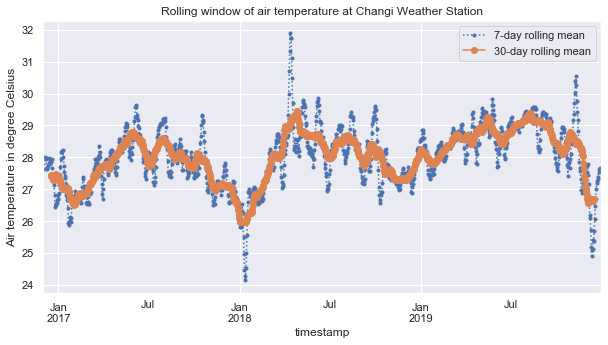

In [36]:

plt.figure(figsize=(10,5))
df_weather_data_7days['air temperature'].plot(marker='.', linestyle=':', label='7-day rolling mean')
df_weather_data_30days['air temperature'].plot(marker='o', linestyle='-', label='30-day rolling mean')
plt.xlabel('timestamp')
plt.ylabel('Air temperature in degree Celsius')
plt.title('Rolling window of air temperature at Changi Weather Station')
plt.legend();


C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
C:\Users\chinhwee\Anaconda3\envs\python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


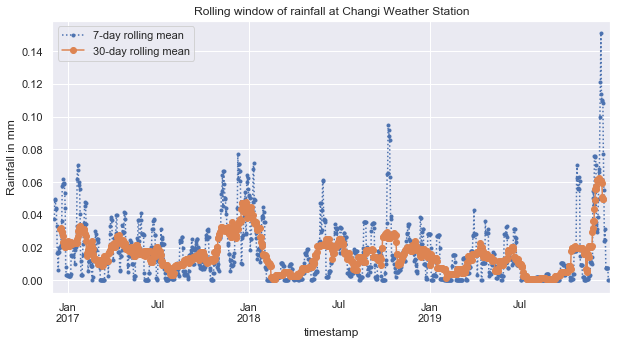

In [37]:

plt.figure(figsize=(10,5))
df_weather_data_7days['rainfall'].plot(marker='.', linestyle=':', label='7-day rolling mean')
df_weather_data_30days['rainfall'].plot(marker='o', linestyle='-', label='30-day rolling mean')
plt.xlabel('timestamp')
plt.ylabel('Rainfall in mm')
plt.title('Rolling window of rainfall at Changi Weather Station')
plt.legend();

